In [1]:
import pandas as pd
import random as rdm
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 12,9

### График 1-3

По просьбе коллег, были собраны данные(данные не парсил, а скопировал вручную из разных источников, ибо сроки диплома поджимают ;) и проанализированы несколько компаний, для выявления их прибыльности за определенный период. Задача не сложная с точки зрения анализа, т.к данных мало, однако для отработки графиков-примитивов, думаю, подойдет.

In [2]:
company1 = 'ООО "ТРАНСНЕФТЬ-ЛОГИСТИКА"'

In [3]:
trans_log = pd.read_csv('transneft`-logistika.txt', index_col=0)
trans_log

,тыс.руб.
год,
2012,327478
2013,591424
2014,349193
2015,53954
2016,80144
2017,126189
2018,255059


In [4]:
trans_log.columns = ['тыс.руб.']

In [5]:
trans_logk =  trans_log['тыс.руб.']/1000
trans_logk.round(0)

год
2012    327.0
2013    591.0
2014    349.0
2015     54.0
2016     80.0
2017    126.0
2018    255.0
Name: тыс.руб., dtype: float64

Text(0, 0.5, 'год')

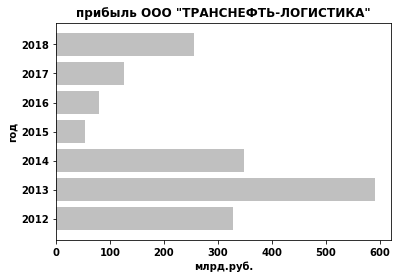

In [114]:
plt.barh(trans_log.index, trans_log['тыс.руб.']/1000, color='silver')
plt.title(f'прибыль {company1}')
plt.xlabel('млрд.руб.')
plt.ylabel('год')

In [7]:
company2 = 'ПАО "ТРАНСНЕФТЬ"'

In [8]:
transneft = pd.read_csv('transneft`.txt', index_col=0)
transneft

,тыс.руб.
год,
2007,4018463
2008,3681621
2009,3893243
2010,4893532
2011,11141791
2012,10652444
2013,11260439
2014,11783833
2015,12801410


Text(0.5, 0, 'год')

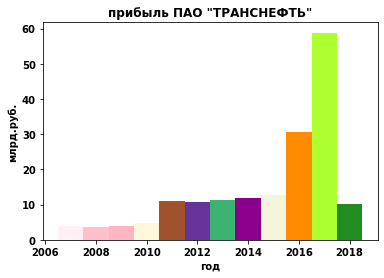

In [115]:
all_colors = list(plt.cm.colors.cnames.keys())
n = len(transneft.index)
c = rdm.choices(all_colors, k=n)
plt.bar(transneft.index, transneft['тыс.руб.']/1000000, color=c, width=1)
plt.title(f'прибыль {company2}')
plt.ylabel('млрд.руб.')
plt.xlabel('год')

In [10]:
company3 = 'ПАО "НЕФТЯНАЯ КОМПАНИЯ "РОСНЕФТЬ"'

In [11]:
rosneft = pd.read_csv('rosneft`.txt', index_col=0)
rosneft

,тыс.руб.
год,
2011,236747308
2012,297983692
2013,137305207
2014,501676298
2015,239413255
2016,99236214
2017,138968980
2018,460784009


In [12]:
all_company = transneft.merge(rosneft, on = 'год', how = 'outer').merge(trans_log, on = 'год', how = 'outer')/1000000
all_company

,тыс.руб._x,тыс.руб._y,тыс.руб.
год,,,
2007,4.018463,NaN,NaN
2008,3.681621,NaN,NaN
2009,3.893243,NaN,NaN
2010,4.893532,NaN,NaN
2011,11.141791,236.747308,NaN
2012,10.652444,297.983692,0.327478
2013,11.260439,137.305207,0.591424
2014,11.783833,501.676298,0.349193
2015,12.801410,239.413255,0.053954


In [13]:
all_company.columns = company2, company3, company1
all_company

,"ПАО ""ТРАНСНЕФТЬ""","ПАО ""НЕФТЯНАЯ КОМПАНИЯ ""РОСНЕФТЬ""","ООО ""ТРАНСНЕФТЬ-ЛОГИСТИКА"""
год,,,
2007,4.018463,NaN,NaN
2008,3.681621,NaN,NaN
2009,3.893243,NaN,NaN
2010,4.893532,NaN,NaN
2011,11.141791,236.747308,NaN
2012,10.652444,297.983692,0.327478
2013,11.260439,137.305207,0.591424
2014,11.783833,501.676298,0.349193
2015,12.801410,239.413255,0.053954


Text(0, 0.5, 'млрд.руб.')

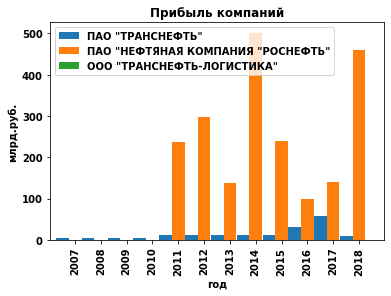

In [109]:
all_company.plot(kind='bar', width=1.47)
plt.title('Прибыль компаний')
plt.ylabel('млрд.руб.')

#### Выводы

Динамика чистой прибыли всех компаний исключительно положительная.
Уровень прибыли логистической компании абсолютно не соразмерен с нефтеными

### График 4,5 

Проанализировать подборку своих фильмом с кинопоиска с БД 280000 пользователей https://grouplens.org/datasets/movielens/latest/).

Выявить свои самые популярные жанры и сравнить с популярными жанрами БД.
Определить процент русских фильмов

##### Основные предположение до построение: 
- Cамый популярный жанр(и мой в том числе) - Драма, Комедия
- Популярные жанры пользователей отлиются от моих, за исключением Драма, Комедии

In [15]:
# foggy = pd.read_html('foggy_test.xls', sep='\t', encoding='utf-8', quotechar='"', delimiter=',')
foggy = pd.read_html('foggy_test.xls')[0]
foggy.head()

,0,1,2,3,4
0,русскоязычное название,оригинальное название,год,моя оценка,дата и время
1,Милая Фрэнсис,Frances Ha,2012,-,00:48:13 21.01.2020
2,Леди Бёрд,Lady Bird,2017,-,11:53:03 19.01.2020
3,Тело,El cuerpo,2012,-,01:48:35 02.01.2020
4,Супер 30,Super 30,2019,-,00:11:48 30.12.2019


In [16]:
foggy.columns = foggy.iloc[0]

In [17]:
foggy.head()

,русскоязычное название,оригинальное название,год,моя оценка,дата и время
0,русскоязычное название,оригинальное название,год,моя оценка,дата и время
1,Милая Фрэнсис,Frances Ha,2012,-,00:48:13 21.01.2020
2,Леди Бёрд,Lady Bird,2017,-,11:53:03 19.01.2020
3,Тело,El cuerpo,2012,-,01:48:35 02.01.2020
4,Супер 30,Super 30,2019,-,00:11:48 30.12.2019


In [18]:
foggy.drop([0])

,русскоязычное название,оригинальное название,год,моя оценка,дата и время
1,Милая Фрэнсис,Frances Ha,2012,-,00:48:13 21.01.2020
2,Леди Бёрд,Lady Bird,2017,-,11:53:03 19.01.2020
3,Тело,El cuerpo,2012,-,01:48:35 02.01.2020
4,Супер 30,Super 30,2019,-,00:11:48 30.12.2019
5,Достать ножи,Knives Out,2019,-,19:48:23 29.12.2019
6,2001 год: Космическая одиссея,2001: A Space Odyssey,1968,-,08:57:29 14.12.2019
7,Джой,Joy,2015,-,08:56:56 14.12.2019
8,Адаптация,Adaptation.,2002,-,04:55:11 11.12.2019
9,Ford против Ferrari,Ford v Ferrari,2019,-,15:29:04 01.12.2019
10,Клаус,Klaus,2019,-,19:49:29 21.11.2019


In [19]:
foggy.columns = ['русскоязычное название', 'title', 'год', 'моя оценка',
       'дата и время']

In [20]:
foggy.columns

Index(['русскоязычное название', 'title', 'год', 'моя оценка', 'дата и время'], dtype='object')

In [21]:
foggy.drop([0]).dropna()

,русскоязычное название,title,год,моя оценка,дата и время
1,Милая Фрэнсис,Frances Ha,2012,-,00:48:13 21.01.2020
2,Леди Бёрд,Lady Bird,2017,-,11:53:03 19.01.2020
3,Тело,El cuerpo,2012,-,01:48:35 02.01.2020
4,Супер 30,Super 30,2019,-,00:11:48 30.12.2019
5,Достать ножи,Knives Out,2019,-,19:48:23 29.12.2019
6,2001 год: Космическая одиссея,2001: A Space Odyssey,1968,-,08:57:29 14.12.2019
7,Джой,Joy,2015,-,08:56:56 14.12.2019
8,Адаптация,Adaptation.,2002,-,04:55:11 11.12.2019
9,Ford против Ferrari,Ford v Ferrari,2019,-,15:29:04 01.12.2019
10,Клаус,Klaus,2019,-,19:49:29 21.11.2019


In [22]:
foggy_upd = foggy['title'].dropna()
foggy_upd.head(12)

0     оригинальное название
1                Frances Ha
2                 Lady Bird
3                 El cuerpo
4                  Super 30
5                Knives Out
6     2001: A Space Odyssey
7                       Joy
8               Adaptation.
9            Ford v Ferrari
10                    Klaus
12         Si shi qing chun
Name: title, dtype: object

In [23]:
len(foggy_upd)
# def search_title(row):

1424

In [24]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
"""
%%time
for i in foggy_upd:
    for n in range(len(movies['title'])):
        if i in movies['title'][n]:
            print('true')
            
Wall time: 14min 54s - очень долго
"""

"\n%%time\nfor i in foggy_upd:\n    for n in range(len(movies['title'])):\n        if i in movies['title'][n]:\n            print('true')\n            \nWall time: 14min 54s - очень долго\n"

In [26]:
def year_column(row):
    return (row.split(' ')[-1])[1:-1]

In [27]:
movies['year'] = movies['title'].apply(year_column)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [28]:
def del_year(row):
    return (row.replace(row, row.replace(row, row[0:(len(row)-7)])))

In [29]:
movies['Title'] = movies['title'].apply(del_year)
movies.head()

,movieId,title,genres,year,Title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II


In [30]:
def search_substring(row):
    for i in foggy_upd:
        if i.lower() == row.lower():
            return i
        else:
            continue

In [31]:
%%time
movies['foggy'] = movies['Title'].apply(search_substring)
movies.head()

Wall time: 28.1 s


,movieId,title,genres,year,Title,foggy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,Toy Story
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Jumanji,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men,None
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Waiting to Exhale,None
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II,None


In [32]:
len(movies['foggy'])

58098

In [33]:
movies_upd = movies.dropna()
movies_upd.head()

,movieId,title,genres,year,Title,foggy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,Toy Story
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Jumanji,Jumanji
5,6,Heat (1995),Action|Crime|Thriller,1995,Heat,Heat
12,13,Balto (1995),Adventure|Animation|Children,1995,Balto,Balto
15,16,Casino (1995),Crime|Drama,1995,Casino,Casino


In [34]:
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [35]:
genres_of_all = movies['genres'].str.get_dummies().sum()
genres_of_all = genres_of_all[1:]
genres_of_all

Action          7130
Adventure       4067
Animation       2663
Children        2749
Comedy         15956
Crime           5105
Documentary     5118
Drama          24144
Fantasy         2637
Film-Noir        364
Horror          5555
IMAX             197
Musical         1113
Mystery         2773
Romance         7412
Sci-Fi          3444
Thriller        8216
War             1820
Western         1378
dtype: int64

In [36]:
frame = {'values': genres_of_all.values}
df_all = pd.DataFrame(frame, index=genres_of_all.index)
df_all.head()

,values
Action,7130
Adventure,4067
Animation,2663
Children,2749
Comedy,15956


In [37]:
df_all['values'].value_counts(normalize=True)

5118     0.052632
5105     0.052632
1378     0.052632
4067     0.052632
197      0.052632
2663     0.052632
364      0.052632
2637     0.052632
24144    0.052632
7412     0.052632
2749     0.052632
5555     0.052632
15956    0.052632
2773     0.052632
8216     0.052632
1113     0.052632
7130     0.052632
1820     0.052632
3444     0.052632
Name: values, dtype: float64

#### ^^^ в некоторых ДЗ пользовался этим методом для нормализации, но тут работает как то не так.


In [38]:
c1 = genres_of_all.index.ravel()
c1

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype=object)

In [39]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

c2 = np.array(genres_of_all.values)
c2 = min_max_scaler.fit_transform(c2.reshape(-1, 1)).ravel()
c2

array([0.28951434, 0.16160688, 0.10297741, 0.10656867, 0.65807826,
       0.2049526 , 0.20549547, 1.        , 0.10189168, 0.00697373,
       0.2237441 , 0.        , 0.03825114, 0.10757089, 0.30129035,
       0.1355911 , 0.33486449, 0.06777467, 0.04931724])

#### ^^^ верноли я нормировал в диапазоне (0,1). А то когда reshape(0,1) делаешь, ошибку выдает

In [40]:
frame = {'genres': c1, 'values': c2}
df_all = pd.DataFrame(frame)
df_all = df_all.set_index('genres')
df_all

,values
genres,
Action,0.289514
Adventure,0.161607
Animation,0.102977
Children,0.106569
Comedy,0.658078
Crime,0.204953
Documentary,0.205495
Drama,1.000000
Fantasy,0.101892


In [41]:
my_genres = movies_upd['genres'].str.get_dummies().sum()
my_genres = my_genres[1:]
my_genres.head()

Action       308
Adventure    248
Animation     64
Children      85
Comedy       374
dtype: int64

In [42]:
frame = {'values': my_genres.values}
my_df = pd.DataFrame(frame, index=my_genres.index)
my_df.head()

,values
Action,308
Adventure,248
Animation,64
Children,85
Comedy,374


In [43]:
c1 = my_genres.index.ravel()
c1

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype=object)

In [44]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

c2 = np.array(my_genres.values)
c2 = min_max_scaler.fit_transform(c2.reshape(-1, 1)).ravel()
c2

array([0.48  , 0.384 , 0.0896, 0.1232, 0.5856, 0.2704, 0.0256, 1.    ,
       0.1792, 0.    , 0.0816, 0.0816, 0.0256, 0.1104, 0.3408, 0.232 ,
       0.3584, 0.0976, 0.024 ])

In [45]:
frame = {'genres': c1, 'values': c2}
my_df = pd.DataFrame(frame)
my_df = my_df.set_index('genres')
my_df

,values
genres,
Action,0.4800
Adventure,0.3840
Animation,0.0896
Children,0.1232
Comedy,0.5856
Crime,0.2704
Documentary,0.0256
Drama,1.0000
Fantasy,0.1792


In [46]:
df = df_all.merge(my_df, how='outer', on='genres')
df.columns = 'all', 'my'
# df = df.reset_index()
df

,all,my
genres,,
Action,0.289514,0.4800
Adventure,0.161607,0.3840
Animation,0.102977,0.0896
Children,0.106569,0.1232
Comedy,0.658078,0.5856
Crime,0.204953,0.2704
Documentary,0.205495,0.0256
Drama,1.000000,1.0000
Fantasy,0.101892,0.1792


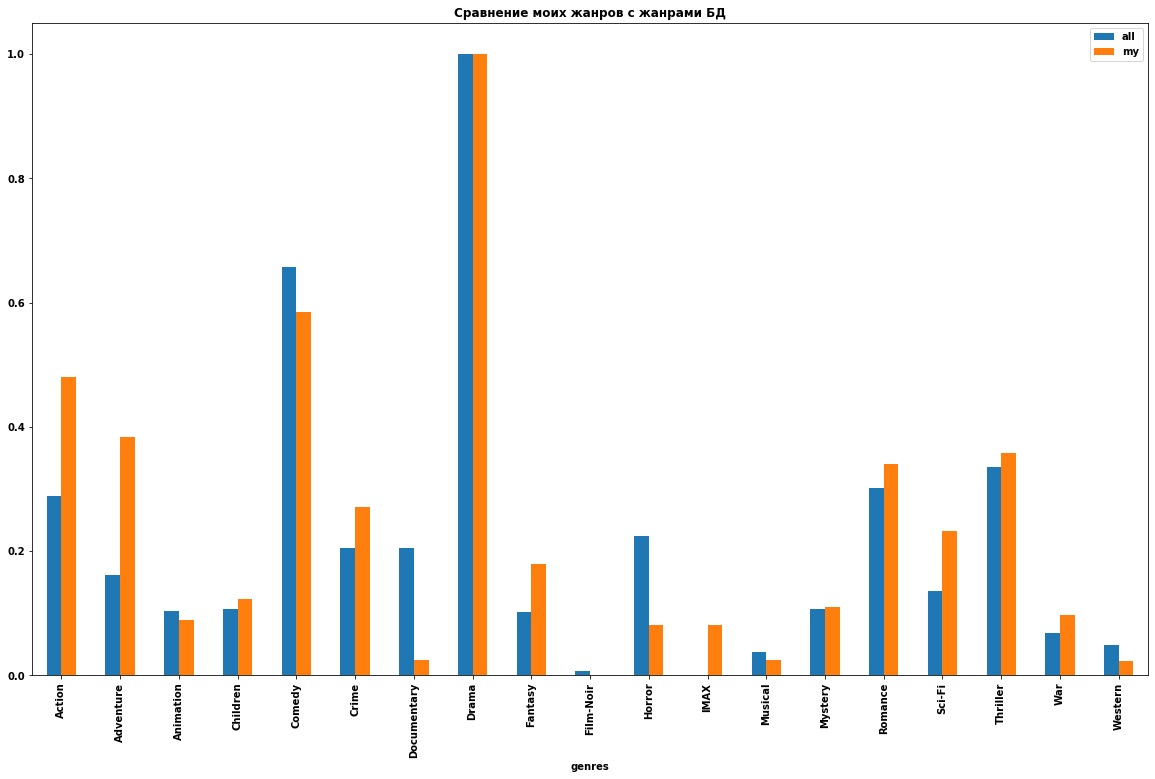

In [130]:
df.plot(kind='bar', title='Сравнение моих жанров с жанрами БД', figsize=(20,12))

### Выводы:
##### График подтверждает гипотезу самого популярного жанра - Драма, Комедия
##### Мои популярные жанры отличающиеся от пользователей БД Action, Adventure, Fantasy, Sci-Fi

In [129]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
count_year = movies.groupby('year', as_index=False).movieId.count()
count_year = count_year[count_year['year'].str.isdigit()]
count_year = count_year[1:]
count_year = count_year[1:-1]
count_year.head()

,year,movieId
4,1878,1
5,1883,1
6,1887,1
7,1888,4
8,1890,5


In [124]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
count_year_my = movies_upd.groupby('year', as_index=False).movieId.count()
count_year_my = count_year_my[count_year_my['year'].str.isdigit()]
count_year_my = count_year_my[1:]
count_year_my = count_year_my[1:-1]
count_year_my.head()

,year,movieId
2,1916,1
3,1920,1
4,1922,1
5,1924,1
6,1926,2


In [128]:
trace = go.Bar(x = count_year.year, y = count_year.movieId)

layout = go.Layout(title='Все фильмы по годам')

fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [131]:
trace = go.Bar(x = count_year_my.year, y = count_year_my.movieId)

layout = go.Layout(title='Мои фильмы по годам')

fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

### Выводы
##### Вид графиков похож. В целом тренд схож.
##### В подборке моих фильмов, очень мало фильмов до 1980 года